Trying to implement Grover's Algorthim


In [11]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

In [12]:
def oracle_11():
    #this gate mutlipys phase by -1
    oracle=QuantumCircuit(2)
    #making phase flip ie CZ gate
    oracle.h(1)
    oracle.cx(0,1)
    oracle.h(1)
    
    display(oracle.draw("mpl"))
    return oracle 

In [13]:
def diffuser_11():
    #this gate inverts the amplitude about average
    diffuser=QuantumCircuit(2)
    diffuser.x(1)
    #making phase flip ie CZ gate
    diffuser.h(1)
    diffuser.cx(0,1,ctrl_state="0")
    diffuser.h(1)
    
    diffuser.x(1)
    
    display(diffuser.draw("mpl"))
    return diffuser
    

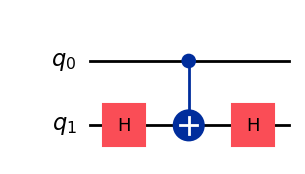

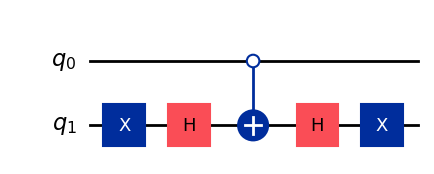

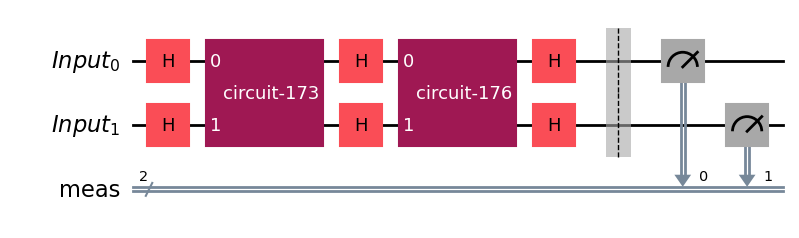

In [14]:
#Bits initialize
q=QuantumRegister(2,"Input")
out=ClassicalRegister(2,"Output")
crqt=QuantumCircuit(q)
crqt.h(q)

#For now oracle for 2 bit custom n bit later
oracle_gate=oracle_11().to_gate()
diffuser_gate=diffuser_11().to_gate()

crqt.append(oracle_gate,q)
crqt.h(q)
crqt.append(diffuser_gate,q)
crqt.h(q)
crqt.decompose()
'''DEBUG
state = Statevector.from_instruction(crqt)
probs = state.probabilities_dict()
print(probs)  '''


crqt.measure_all(out)
display(crqt.draw("mpl"))



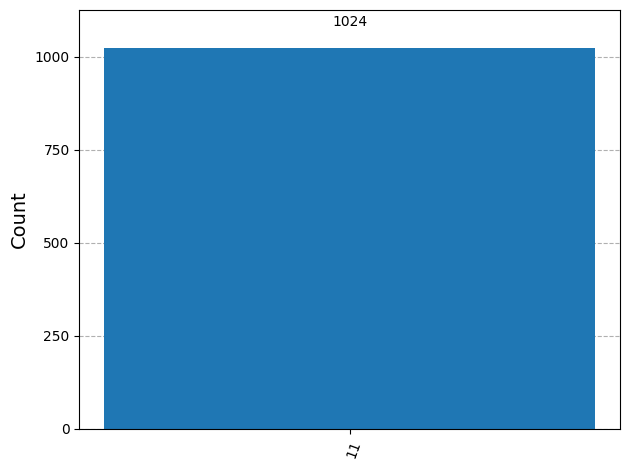

In [15]:
sim=AerSimulator()
compliled=transpile(crqt,sim)
result=sim.run(compliled,shots=1024).result()
stats=result.get_counts()
plot_histogram(stats)